# compare the forward modeled `provabgs` photometry to SV3

In [1]:
import os
import numpy as np 
# --- astropy ---
from astropy.table import Table
# --- plotting --- 
import corner as DFM
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [2]:
from provabgs import infer as Infer
from provabgs import models as Models

In [3]:
sv3_bgs = Table.read('/Users/chahah/data/provabgs/sv3.20210420.bgs_clean.fits')

In [4]:
sv3_gflux = sv3_bgs['FLUX_G']
sv3_rflux = sv3_bgs['FLUX_R']
sv3_zflux = sv3_bgs['FLUX_Z']

sv3_gflux_ivar = sv3_bgs['FLUX_IVAR_G']
sv3_rflux_ivar = sv3_bgs['FLUX_IVAR_R']
sv3_zflux_ivar = sv3_bgs['FLUX_IVAR_Z']

sv3_gmag = 22.5 - 2.5*np.log10(sv3_gflux.clip(1e-16))
sv3_rmag = 22.5 - 2.5*np.log10(sv3_rflux.clip(1e-16))
sv3_zmag = 22.5 - 2.5*np.log10(sv3_zflux.clip(1e-16))

sv3_z = sv3_bgs['Z']

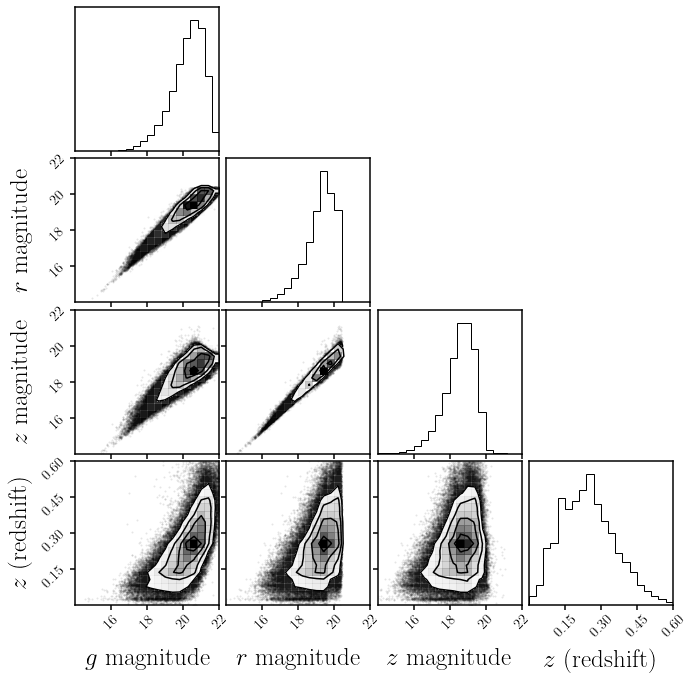

In [5]:
fig = DFM.corner(np.vstack([sv3_gmag, sv3_rmag, sv3_zmag, sv3_z]).T,
                 labels=['$g$ magnitude', '$r$ magnitude', '$z$ magnitude', '$z$ (redshift)'],
                 label_kwargs={'fontsize': 25}, 
                 range=[(14., 22.), (14., 22.), (14., 22.), (0., 0.6)])

## read forward modeled photometry

In [6]:
fm_theta = np.load('/Users/chahah/data/arcoiris/provabgs_cnf/train_decam.v0.thetas_sps.npy')
fm_theta_unt = np.load('/Users/chahah/data/arcoiris/provabgs_cnf/train_decam.v0.thetas_unt_sps.npy')
fm_photo = np.load('/Users/chahah/data/arcoiris/provabgs_cnf/train_decam.v0.xphoto_nonoise.npy')

fm_gflux = fm_photo[:,0]
fm_rflux = fm_photo[:,1]
fm_zflux = fm_photo[:,2]

fm_gmag = 22.5 - 2.5*np.log10(fm_gflux.clip(1e-16))
fm_rmag = 22.5 - 2.5*np.log10(fm_rflux.clip(1e-16))
fm_zmag = 22.5 - 2.5*np.log10(fm_zflux.clip(1e-16))

fm_z = fm_theta[:,-1]

In [7]:
(fm_gmag - fm_rmag).max()

2.9968083697705197

In [8]:
(fm_gmag - fm_rmag).max()

2.9968083697705197

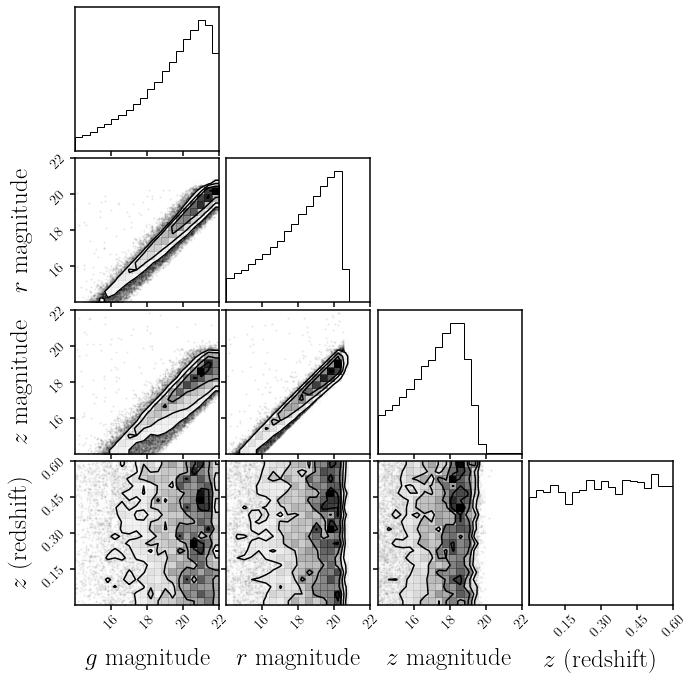

In [9]:
fig = DFM.corner(np.vstack([fm_gmag, fm_rmag, fm_zmag, fm_z]).T,
                 labels=['$g$ magnitude', '$r$ magnitude', '$z$ magnitude', '$z$ (redshift)'],
                 label_kwargs={'fontsize': 25}, 
                 range=[(14., 22.), (14., 22.), (14., 22.), (0., 0.6)])

(-1.0, 4.0)

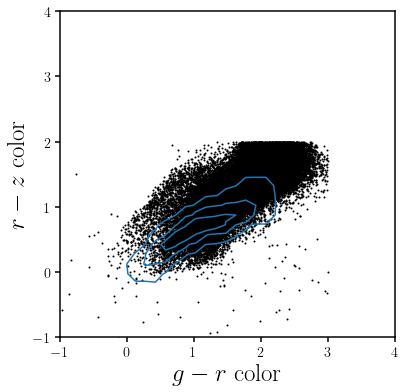

In [10]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
_ = DFM.hist2d(sv3_gmag - sv3_rmag, sv3_rmag - sv3_zmag, 
               range=[(-1., 2.), (-1., 2.)], levels=[0.68, 0.95, 0.997],
              plot_density=False, plot_datapoints=False, color='C0', ax=sub)
sub.scatter(fm_gmag - fm_rmag, fm_rmag - fm_zmag, c='k', s=1)

sub.set_xlabel('$g-r$ color', fontsize=25)
sub.set_xlim(-1, 4)
sub.set_ylabel('$r-z$ color', fontsize=25)
sub.set_ylim(-1, 4)

(-1.0, 2.0)

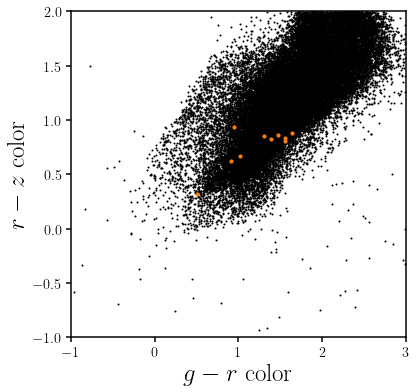

In [11]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
sub.scatter(fm_gmag - fm_rmag, fm_rmag - fm_zmag, c='k', s=1)
sub.scatter((sv3_gmag - sv3_rmag)[:10], (sv3_rmag - sv3_zmag)[:10], c='C1', s=10)

sub.set_xlabel('$g-r$ color', fontsize=25)
sub.set_xlim(-1, 3)
sub.set_ylabel('$r-z$ color', fontsize=25)
sub.set_ylim(-1, 2)

(-1.0, 3.0)

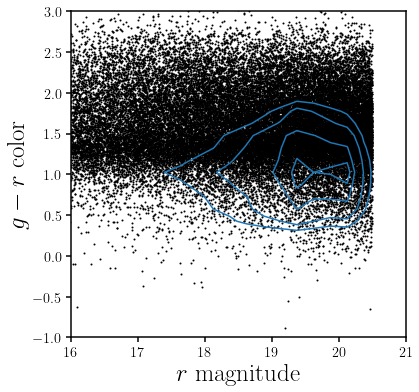

In [12]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
_ = DFM.hist2d(sv3_rmag, sv3_gmag - sv3_rmag, range=[(16., 21.), (-1., 2.)], 
              plot_density=False, plot_datapoints=False, color='C0', ax=sub)
sub.scatter(fm_rmag, fm_gmag - fm_rmag, c='k', s=1)

sub.set_xlabel('$r$ magnitude', fontsize=25)
sub.set_ylabel('$g-r$ color', fontsize=25)
sub.set_ylim(-1, 3)